# Initial Setup
Load data from "music_genre.csv" in folder using pandas. Save the data frame back to SQLite; leveraging mostly SQL for analysis. Plot items using pyplot from matlab.

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import numpy as np

# read csv
music_genre = pd.read_csv('music_genre.csv')

# create an in-memory sqlite database and save the data frame to it
conn = sqlite3.connect(":memory:")
music_genre.to_sql(name='music', con=conn)
cur = conn.cursor()

# grab average danceability, popularity, and key from the table we just created
cur.execute('SELECT AVG(danceability) danceability, AVG(popularity) popularity, key FROM music GROUP BY key')
avg_result = cur.fetchall()

avg_danceability = []
avg_popularity = []
avg_song_key = []

# iterate over the rows return and account for NULLs in the results
for row in avg_result:
    item_dancebility = row[0]
    if item_dancebility is None:
        avg_danceability.append(0)
    else: 
        avg_danceability.append(item_dancebility)
    item_pop = row[1]    
    if item_pop is None:
        avg_popularity.append(0)
    else:
        avg_popularity.append(item_pop)
    item_key = row[2]
    if item_key is None:
        avg_song_key.append("?")
    else:
        avg_song_key.append(item_key)

# Average Danceability versus Song Key

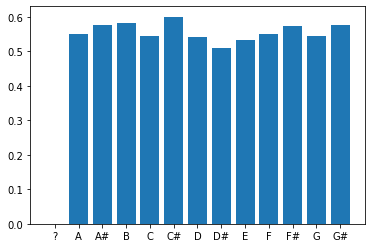

In [5]:
plt.bar(avg_song_key, avg_danceability)
plt.show()

# Average Popularity versus Song Key


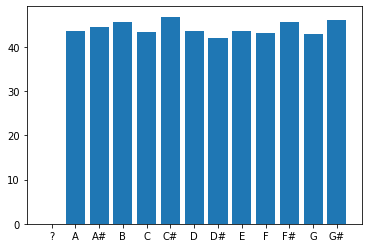

In [6]:
plt.bar(avg_song_key, avg_popularity)
plt.show()

# Breakdown by Key
Looking at min, max, and average for every key.

## Code

In [11]:
# grab danceability, popularity, and key from the table we just created
cur.execute("SELECT MIN(danceability) min_dance, MAX(danceability) max_dance, MIN(popularity) min_pop, MAX(popularity) max_pop, key FROM music GROUP BY key")
result = cur.fetchall()

min_dance = []
max_dance = []
min_pop = []
max_pop = []
song_key = []

# iterate over the rows return and account for NULLs in the results
for row in result:
    i_min_dance = row[0]
    if i_min_dance is not None:
        min_dance.append(i_min_dance)
    i_max_dance = row[1]    
    if i_max_dance is not None:
        max_dance.append(i_max_dance)
    item_key = row[2]
    if item_key is None:
        song_key.append("?")
    else:
        song_key.append(item_key)

min_dance = min(danceability)
max_dance = max(danceability)

print("Min danceability for Key A:", min_dance)
print("Min danceability for Key A:", max_dance)


Min danceability for Key A: 0.06
Min danceability for Key A: 0.971
